<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/MLCase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Compute --Use seaborn to create a jointplotto compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?


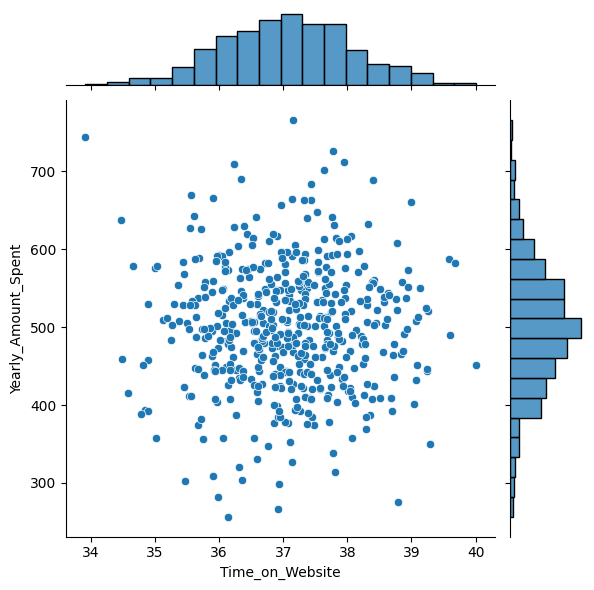

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/FyntraCustomerData.csv')

sns.jointplot(x='Time_on_Website', y='Yearly_Amount_Spent', data=df, kind='scatter')
plt.show()


2.Compute –Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1stOne?

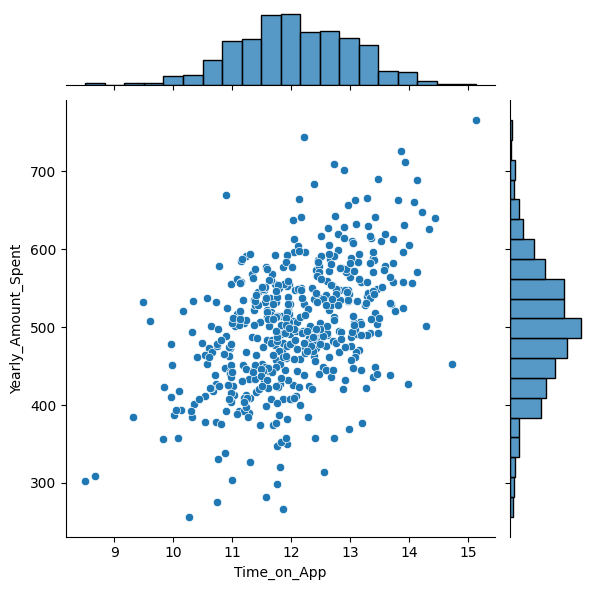

Correlation coefficient (Time_on_App vs Yearly_Amount_Spent): 0.4993277700598346
Correlation coefficient (Time_on_Website vs Yearly_Amount_Spent): -0.002640844717963287
The correlation between 'Time_on_App' and 'Yearly_Amount_Spent' is stronger.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/FyntraCustomerData.csv')

sns.jointplot(x='Time_on_App', y='Yearly_Amount_Spent', data=df, kind='scatter')
plt.show()

correlation_app = df['Time_on_App'].corr(df['Yearly_Amount_Spent'])
print("Correlation coefficient (Time_on_App vs Yearly_Amount_Spent):", correlation_app)

correlation_website = df['Time_on_Website'].corr(df['Yearly_Amount_Spent'])
print("Correlation coefficient (Time_on_Website vs Yearly_Amount_Spent):", correlation_website)

if correlation_app > correlation_website:
    print("The correlation between 'Time_on_App' and 'Yearly_Amount_Spent' is stronger.")
else:
    print("The correlation between 'Time_on_Website' and 'Yearly_Amount_Spent' is stronger.")


3.Compute --Explore types of relationships across the entire data set using pairplot. Based onthis plot what looks to be themost correlated feature with the Yearly Amount Spent?

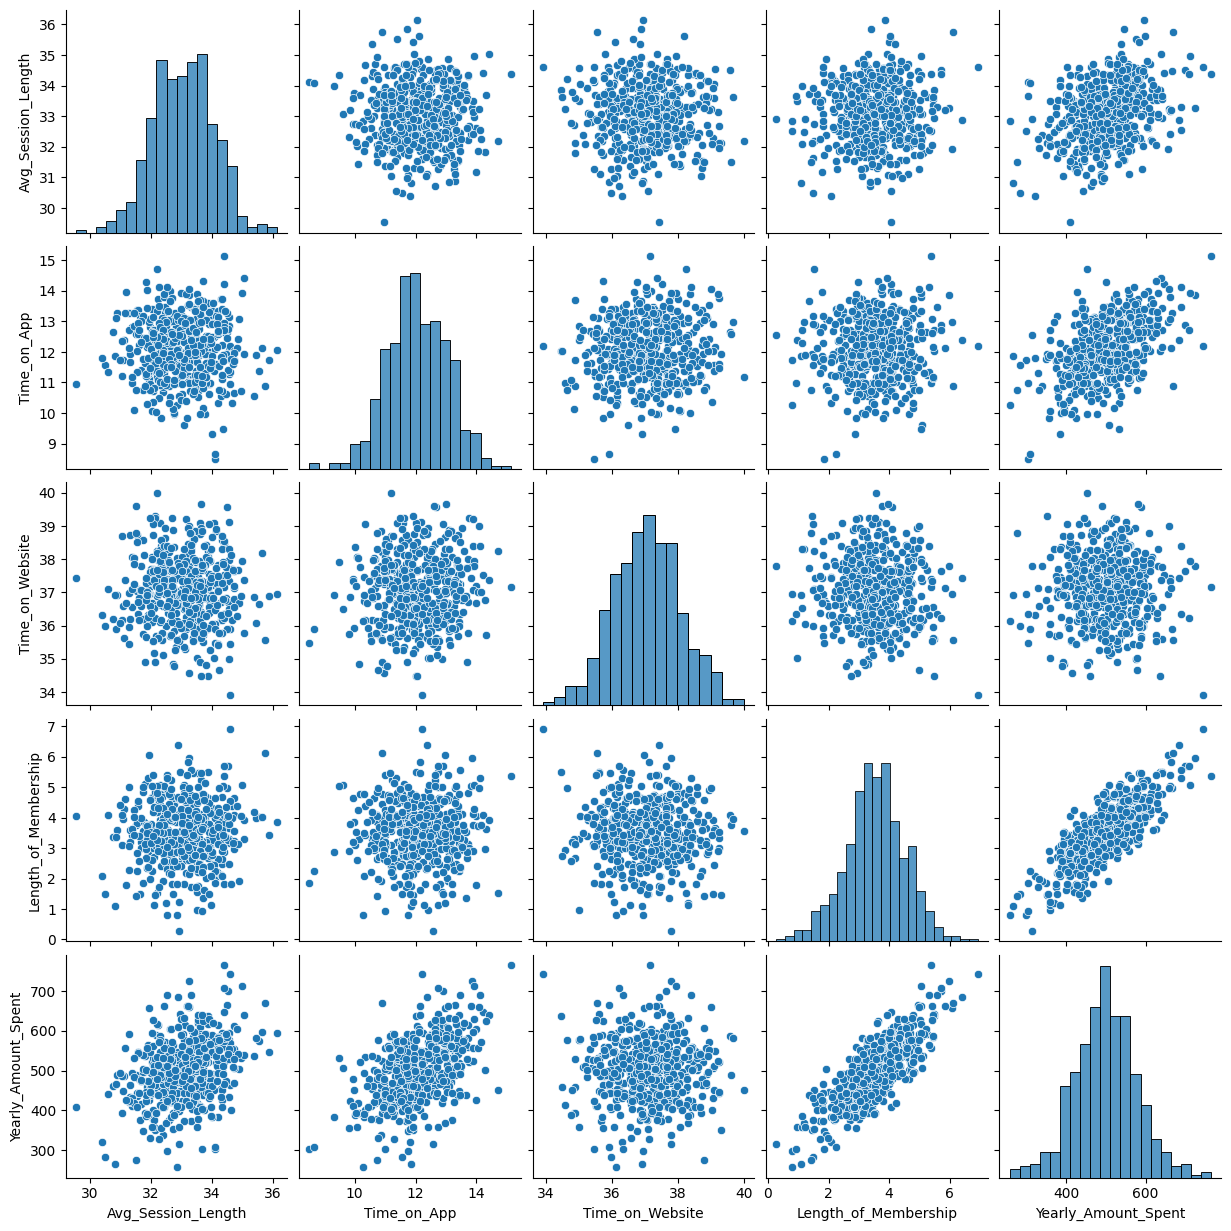

                      Avg_Session_Length  Time_on_App  Time_on_Website  \
Avg_Session_Length              1.000000    -0.027826        -0.034987   
Time_on_App                    -0.027826     1.000000         0.082388   
Time_on_Website                -0.034987     0.082388         1.000000   
Length_of_Membership            0.060247     0.029143        -0.047582   
Yearly_Amount_Spent             0.355088     0.499328        -0.002641   

                      Length_of_Membership  Yearly_Amount_Spent  
Avg_Session_Length                0.060247             0.355088  
Time_on_App                       0.029143             0.499328  
Time_on_Website                  -0.047582            -0.002641  
Length_of_Membership              1.000000             0.809084  
Yearly_Amount_Spent               0.809084             1.000000  
The feature most correlated with 'Yearly_Amount_Spent' is: Yearly_Amount_Spent


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/FyntraCustomerData.csv')
sns.pairplot(df)
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

most_correlated = correlation_matrix['Yearly_Amount_Spent'].idxmax()
print(f"The feature most correlated with 'Yearly_Amount_Spent' is: {most_correlated}")


4.Compute –Create a linear model plot of the Length of Membership and Yearly Amount Spent. Does the data fitwell in a linear plot?

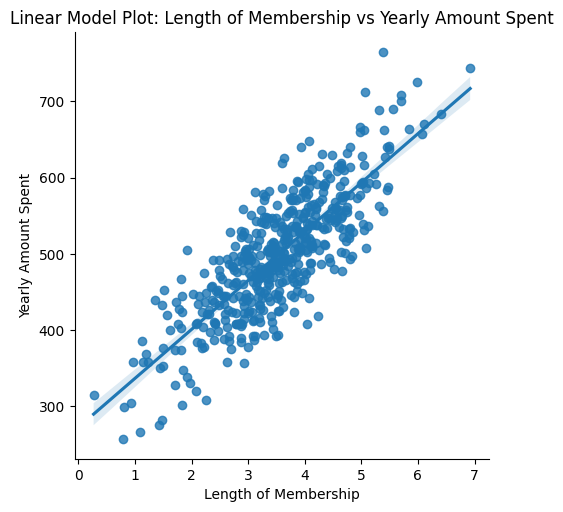

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Length_of_Membership', y='Yearly_Amount_Spent', data=df)
plt.title('Linear Model Plot: Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()


5.Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?

In [11]:
from sklearn.model_selection import train_test_split
y = df['Yearly_Amount_Spent']
x = df.drop(columns=['Yearly_Amount_Spent'])
x = x.select_dtypes(include=['float64', 'int64'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=85)

X_train, X_test, y_train, y_test

(     Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership
 73            32.808698    12.817113        37.031539              3.851579
 351           32.189845    11.386776        38.197483              4.808320
 321           33.674027    12.968893        37.333107              3.229451
 202           31.525752    11.340036        37.039514              3.811248
 306           31.912076    11.792972        36.257819              2.395168
 ..                  ...          ...              ...                   ...
 51            33.900224    10.956791        37.266878              2.952669
 196           32.733224    11.818572        37.102031              1.503854
 397           34.012619    12.914570        36.046204              3.488030
 160           32.838100    12.364342        38.039109              3.309182
 362           33.981006     9.316289        36.914952              2.868428
 
 [400 rows x 4 columns],
      Avg_Session_Length  Time_on_App  Time_on_We

6.Compute –Predict the data and do a scatter plot. Check if actual and predicted data match.

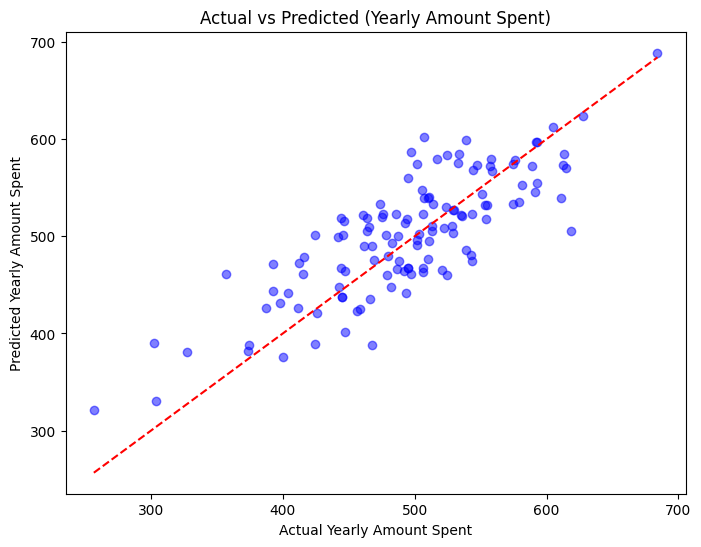

In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Length_of_Membership']]
y = df['Yearly_Amount_Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=85)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Yearly Amount Spent)")
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.show()


7.What is the value of Root Mean Squared Error?

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1800.6900830609031
